# PROJECT NAME : RETAIL SALES PREDICTION.
## Project Type: Regression


---



---





## Project Summary:

---

---

Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of indivitual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. We are provided with historical sales data for **1115 Rossmann stores**. The task is to forecast the **sales column** for the test set. Some of the stores in the dataset were temporarily closed for refurbishment.

## Data Description of each column in our dataset:

---

---


1.   **Id** ⇒ Unique entry id.
2.   **Store** ⇒ Store id
1.   **Sales** ⇒ Sales made for the day
1.   **Customers** ⇒ No. of Customers for the day
1.   **Open** ⇒ Wheather the store was opened or closed (0: closed & 1: open).
2.   **StateHoliday** ⇒ Wheather the day was State holiday or not.
2.   **SchoolHoliday** ⇒ Wheather the day was School holiday or not.
2.   **StoreType** ⇒ Types of Stores.
1.   **Assortment** ⇒ Types of assortment.
1.   **Competitiondistance** ⇒ Distance from the nearest competetor store.
2.   **promo** ⇒ Store running promo or not.
2.   **Promo2** ⇒ Store running consequitive promo or not.






## Importing all the Libraries required to perform the Regression Analysis.

In [112]:
# importing various libraries.
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta

In [113]:
# Importing the EDA libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [114]:
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## Mounting the Google Drive on the Google Colaboratory:

In [115]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the data and Creating DataFrame to store the Data:

In [116]:
Rossmann_df_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project 2 (Regression)/Data file/Rossmann Stores Data.csv')

In [117]:
Store_df_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Project 2 (Regression)/Data file/store.csv')

## Creating the copies of the DataFrame to avoid any permanent change in the Original Data.

In [118]:
Rossmann_df= Rossmann_df_1.copy()
Store_df= Store_df_1.copy()

## Sales_df Data Inspection:

In [119]:
# First look
Store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [120]:
# Checking some Sample Records.
Store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
945,946,a,a,2220.0,12.0,2011.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct"
735,736,c,c,1650.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
66,67,a,c,410.0,2.0,2006.0,0,NaN,NaN,NaN
1008,1009,a,a,230.0,7.0,2004.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
451,452,a,c,1850.0,8.0,2013.0,1,5.0,2011.0,"Feb,May,Aug,Nov"
1013,1014,a,c,210.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
557,558,a,a,3000.0,2.0,2010.0,0,NaN,NaN,NaN
324,325,a,c,350.0,3.0,2011.0,1,22.0,2011.0,"Feb,May,Aug,Nov"
411,412,d,c,4460.0,NaN,NaN,1,39.0,2010.0,"Jan,Apr,Jul,Oct"
1042,1043,c,a,420.0,3.0,2006.0,0,NaN,NaN,NaN


In [121]:
# Checking the shape of Store_df
Store_df.shape

(1115, 10)

In [122]:
# Checking various Columns of Store_df
Store_df.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [123]:
Store_df.describe(include= 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [124]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Handling null, missing and Duplicate values in the Data.

In [125]:
Store_df[Store_df.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [126]:
# So there is no duplicate rows in the Data.

In [127]:
#  Total Null values count.
Store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### As there are lots of 'NaN values' in 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' Columns, we will drop those columns.

In [128]:
Cols_to_drop=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [129]:
#  Droping the unrequired columns having more null values.
Store_df.drop(Cols_to_drop,inplace=True, axis=1)

In [130]:
Store_df.sample(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
415,416,a,c,4650.0,0
655,656,d,a,410.0,1


### As CompetitionDistance column contains less Null Values, we will not remove that column, instead we will be replacing those null values with mean/ median value.

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

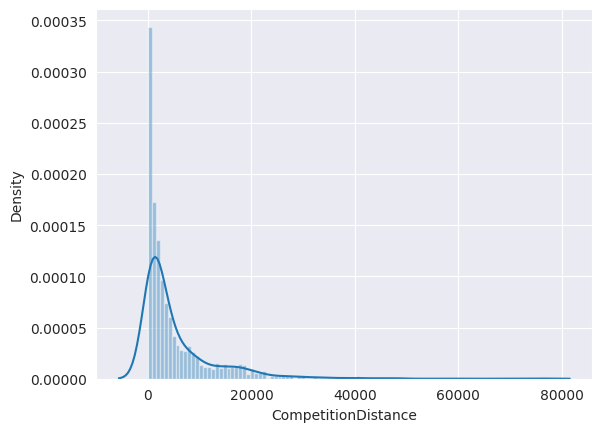

In [131]:
sns.distplot(Store_df.CompetitionDistance,kde=True,bins=100)

## As the distribution is skewed, it is wise to replace the null values of the column **'CompetitionDistance'** with the **median value**.

In [132]:
Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance'].median(), inplace=True)

In [133]:
Store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [134]:
# The null value in the 'CompetitionDistance' column have been handled.

## Checking various Columns:

In [135]:
# Let's check the 'StoreType' Column.

In [136]:
Store_df.StoreType.value_counts()


a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

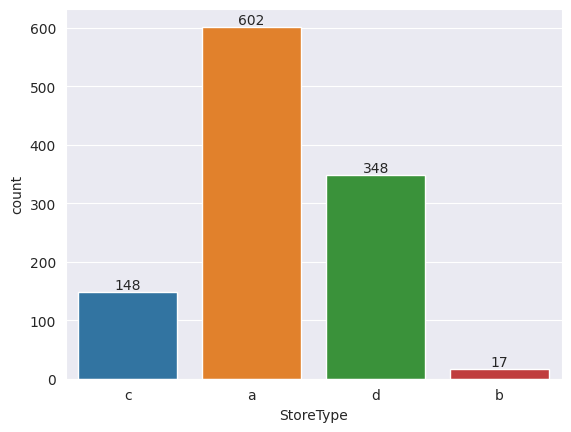

In [137]:
# Let's Create a barplot to show the various Store Types.
fig= sns.countplot(x='StoreType',data=Store_df)

for i in fig.containers:
  fig.bar_label(i)

## This shows that the Type-"A" storetype is present in huge amount compared to the other Store Types.

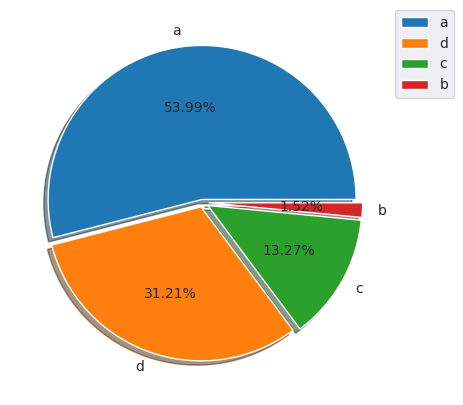

In [138]:
# Let's check it with the pie chart.
plt.figure(figsize=(10,5))
explode=[0.02, 0.03, 0.04, 0.04]
fig=plt.pie(x=Store_df['StoreType'].value_counts(), data=Store_df, labels=Store_df['StoreType'].value_counts().index,
            explode= explode, autopct="%1.2f%%",shadow= True, startangle=0,)
plt.legend(bbox_to_anchor=(1,1),loc='upper left', borderaxespad=0)
plt.show()

## Here we can see that type-a store type is maximum i.e 54% in our data set followed by type-d i.e about 31%.

## While type-b store types is comparatively less i.e  only 1.5%.

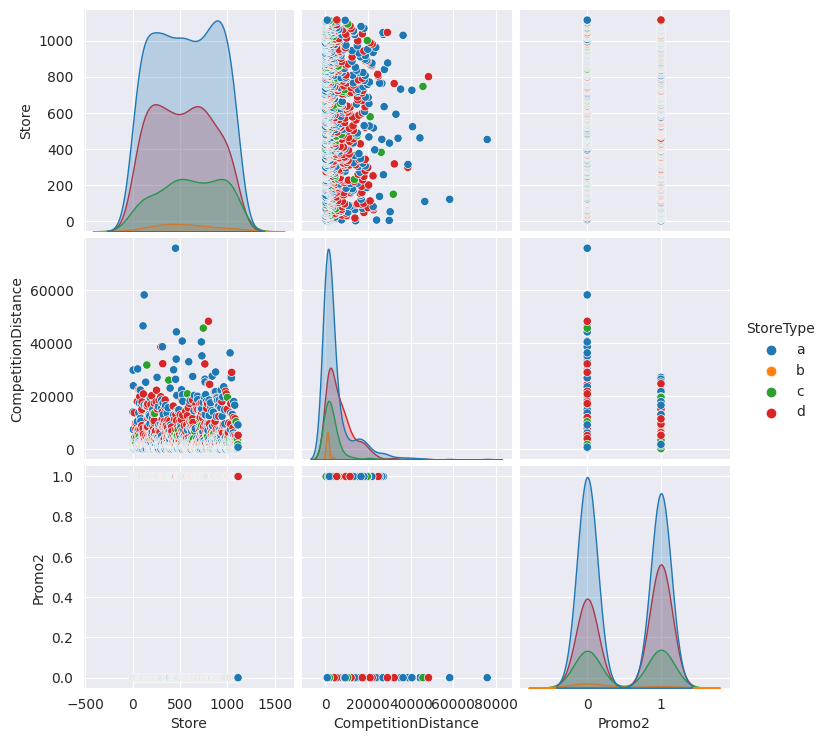

In [139]:
# Let's use pairplot for StoreType to check pairwise relationships between variables within a dataset.
fig= sns.pairplot(data=Store_df, hue='StoreType',hue_order=['a','b','c','d'])
fig


## Here we can see that most of the stores are located in 20000 meter range. So we can say that cometetion is high over here.

In [140]:
# let's check the Column- 'Assortment'

In [141]:
Store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [142]:
# There are 3 type of Assortment in the data.

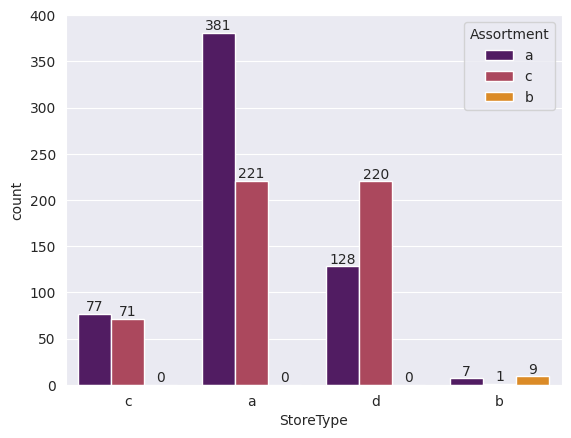

In [143]:
# Let's check assortment type count with respect to store type.
sns.set_style('darkgrid')
fig=sns.countplot(x=Store_df['StoreType'],hue='Assortment', data=Store_df, palette='inferno')

for i in fig.containers:
  fig.bar_label(i)

## From abobe plot we can see that:
### In store type- c & a, assortment type-a is more compared to others.
### But in store type-d, assortment type-c is more compared to others.
### In each store type, assortment type-b is comparatively less.

# **Let's check rossmann_df:**

In [144]:
Rossmann_df.sample(7)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
247436,927,6,2014-12-20,7747,998,1,0,0,0
992077,513,3,2013-01-23,17149,1919,1,1,0,0
279047,715,7,2014-11-16,0,0,0,0,0,0
46391,677,6,2015-06-20,5479,508,1,0,0,0
159751,307,2,2015-03-10,1775,239,1,0,0,0
292614,167,6,2014-11-01,7332,839,1,0,0,0
61647,323,6,2015-06-06,7675,628,1,0,0,0


In [145]:
Rossmann_df.shape

(1017209, 9)

In [146]:
Rossmann_df.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [147]:
Rossmann_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [148]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [149]:
Rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## There is no null values present in the Columns of Rossmann_df Dataset.

In [150]:
# Handling the duplicate values present in the dataset.

In [151]:
len(Rossmann_df[Rossmann_df.duplicated()])

0

## Also there is no duplicate value present in the Dataset.

In [152]:
# Let's analyse the Date column.

In [153]:
Rossmann_df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype 
--------------    ----- 
1017209 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [154]:
# Let's convert the datatype of the 'Date' column from the 'object type' to 'datetime'.

In [155]:
Rossmann_df['Date']=pd.to_datetime(Rossmann_df['Date'])

In [156]:
Rossmann_df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 MB


In [157]:
# Let's extract Day, Month, Year from the Date column of Rossmann_df.
Rossmann_df['Day']=Rossmann_df['Date'].apply(lambda x : x.day)
Rossmann_df['Month']= Rossmann_df['Date'].apply(lambda x : x.month)
Rossmann_df['Year']= Rossmann_df['Date'].apply(lambda x : x.year)

In [158]:
Rossmann_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015


In [159]:
# Let's check the number of unique stores present in the Rossmann_df Dataset.
Rossmann_df['Store'].nunique()

1115

In [160]:
# Unique Years
Rossmann_df.Year.unique()

array([2015, 2014, 2013])

In [161]:
# Let's check the Starting and Final date of the dataset.
print("Starting and Final Date of the Dataset is **{0}** and **{1}** respectively.".format(Rossmann_df.Date.min(), Rossmann_df.Date.max()))
print("So there is {0} of Data.".format( Rossmann_df.Date.max()-Rossmann_df.Date.min()))

Starting and Final Date of the Dataset is **2013-01-01 00:00:00** and **2015-07-31 00:00:00** respectively.
So there is 941 days 00:00:00 of Data.


In [162]:
# Let's check the net sales per month for each Years.

In [163]:
sales_per_month=Rossmann_df.groupby(['Year','Month'])['Sales'].median().reset_index()
sales_per_month

,Year,Month,Sales
0,2013,1,5194.0
1,2013,2,5421.5
2,2013,3,5844.0
3,2013,4,5464.0
4,2013,5,5585.0
5,2013,6,5428.0
6,2013,7,5826.0
7,2013,8,5624.0
8,2013,9,5294.0
9,2013,10,5446.0


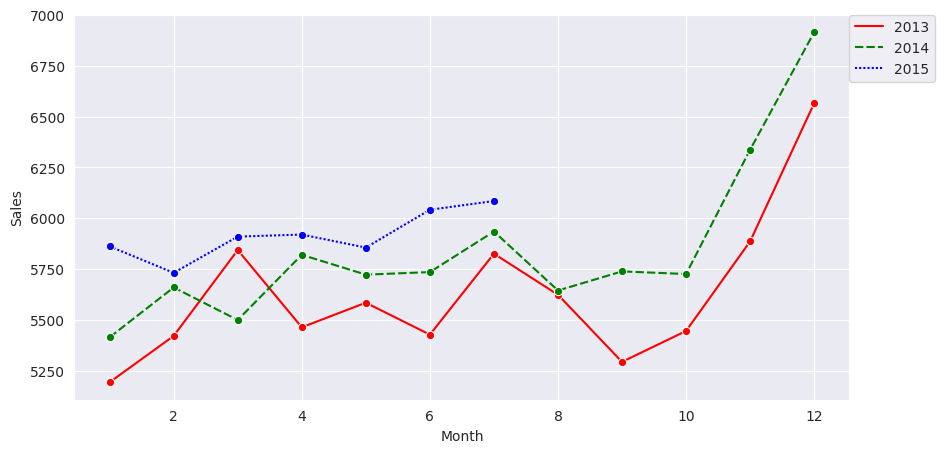

In [164]:
color=['r','g','b']
plt.figure(figsize=(10,5))
fig=sns.lineplot(x='Month',y='Sales', hue='Year', data=sales_per_month, palette=color, marker='o',style='Year')
plt.legend(bbox_to_anchor=(1,1),loc="upper left", borderaxespad=0)


## From above plot we can see that in the year of 2015 the sales run only upto the mopnth of July.

## We can also see that in the month of **October and December**, the sale is increasing exponentially.

## From further research we got that the reason behind the increase in sale is **Winter**, people store drugs for the upcoming winter.

<Axes: >

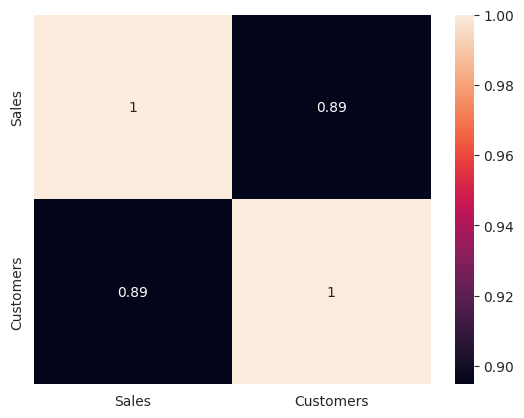

In [165]:
# Let's check the correlation between Sales and Customers Column.
sns.heatmap(Rossmann_df[['Sales','Customers']].corr(),annot=True)